In [1]:
# 加载matplotlib。pyplot库
import matplotlib.pyplot as plt
#让图形在notebook中自动显示
% matplotlib inline

# 加载pandas库（用于数据管理）
import pandas as pd
import numpy as np
# 加载seaborn库
import seaborn as sns
# 华文细黑是相对而言显示效果极好的中文字体
plt.rcParams["font.family"] = "STXIHEI"
#sns.set(font='STXIHEI')

from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import fontManager

#准备CCSS数据集
ccss = pd.read_excel("ccss_sample.xlsx")
ccss.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,上海,男,20,高中/中专,无业/待业/失业/家庭主妇,未婚,1000-1499元,0,...,1250.0,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,北京,女,65,大专,企/事业管理人员,已婚,1000-1499元,0,...,1250.0,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,上海,女,40,高中/中专,公司普通职员（白领）,已婚,99拒绝回答,0,...,NaN,100,100,100,100,150,100,85.917363,88.035919,84.749867


In [2]:
# 对数据进行排序，方便后续计算
ccss.s3.sort_values()

1012    18
949     18
1022    18
1046    18
1055    18
1075    18
978     18
1110    18
1095    19
966     19
993     19
909     19
984     19
1124    19
1044    19
1043    19
1136    19
999     19
595     20
495     20
553     20
532     20
470     20
503     20
0       20
372     20
607     20
331     20
325     20
271     20
        ..
582     63
97      63
12      63
482     63
122     63
710     63
48      63
192     63
226     64
216     64
592     64
30      64
758     64
316     64
703     64
326     64
656     64
334     64
386     64
663     64
321     64
297     65
283     65
194     65
170     65
42      65
33      65
246     65
3       65
275     65
Name: s3, Length: 1147, dtype: int64

In [3]:
#P-P图
# 将数据转换为数据框便于处理
df1 = pd.DataFrame(ccss.s3.sort_values())
df1.head()

,s3
1012,18
949,18
1022,18
1046,18
1055,18


In [4]:
from scipy import stats
# 使用kde函数计算概率密度（最终是图形观察，因此不需要很精确，默认参数即可）
df1['probd'] = stats.gaussian_kde(df1.s3)(df1.s3)
df1.head()

,s3,probd
1012,18,0.012748
949,18,0.012748
1022,18,0.012748
1046,18,0.012748
1055,18,0.012748


In [5]:
# 去除重复值，以便进一步计算累加概率
df1 = df1[~df1.duplicated()]
# 重建索引以便后续使用
df1.reset_index(drop = True, inplace = True)
df1.head()

,s3,probd
0,18,0.012748
1,19,0.017172
2,20,0.021888
3,21,0.026546
4,22,0.030798


In [6]:
# 需要考虑是否对小的误差进行处理
df1.probd.sum()

0.96583531952200219

In [7]:
df1['cprob'] = df1.probd.cumsum()# 如果希望严格0~1,则/df1.probd.sum()
df1.tail()

,s3,probd,cprob
43,61,0.011436,0.933403
44,62,0.010298,0.943700
45,63,0.008917,0.952617
46,64,0.007389,0.960006
47,65,0.005829,0.965835


In [8]:
# 计算基于正态分布假设的理论累加概率分布
df1['cprob0'] = stats.norm.cdf(df1.s3, 
                               loc = df1.s3.mean(),
                               scale = df1.s3.std()
                              )
df1.head()

,s3,probd,cprob,cprob0
0,18,0.012748,0.012748,0.046618
1,19,0.017172,0.029920,0.054012
2,20,0.021888,0.051808,0.062304
3,21,0.026546,0.078355,0.071558
4,22,0.030798,0.109153,0.081831


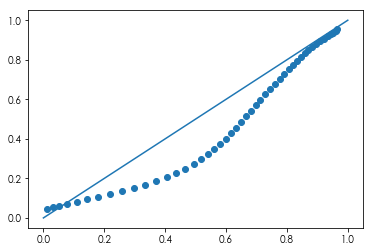

In [9]:
# 完全使用pyplot实现（效果稍差）
plt.scatter(df1.cprob, df1.cprob0)
plt.plot([0,1], [0,1])

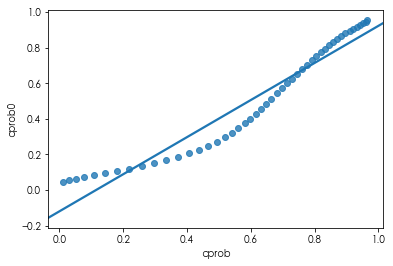

In [10]:
# 使用seaborn中的功能拟合理论直线
sns.regplot(df1.cprob, df1.cprob0, ci = None)

In [11]:
# 近似方法
df1['min0'] = df1.cprob - df1.cprob0
df1.head()

,s3,probd,cprob,cprob0,min0
0,18,0.012748,0.012748,0.046618,-0.033870
1,19,0.017172,0.029920,0.054012,-0.024092
2,20,0.021888,0.051808,0.062304,-0.010496
3,21,0.026546,0.078355,0.071558,0.006797
4,22,0.030798,0.109153,0.081831,0.027321


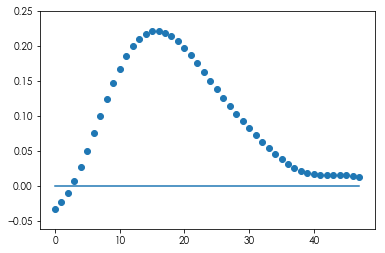

In [12]:
plt.scatter(df1.index, df1.min0)
plt.plot([0,df1.index.max()], [0,0])

((array([-3.23692274, -2.97469426, -2.82855056, ...,  2.82855056,
          2.97469426,  3.23692274]),
  array([18, 18, 18, ..., 65, 65, 65], dtype=int64)),
 (12.357385622090112, 36.358326068003485, 0.95892479609147585))

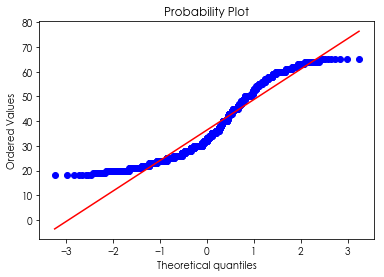

In [13]:
#Q-Q图
from scipy import stats
stats.probplot(ccss.s3, plot = plt)

((array([-3.23692274, -2.97469426, -2.82855056, ...,  2.82855056,
          2.97469426,  3.23692274]),
  array([   0.        ,   15.62133875,   23.43200812, ...,  156.21338749,
          156.21338749,  156.21338749])),
 (20.768593421460615, 95.893501420935763, 0.98711075009323435))

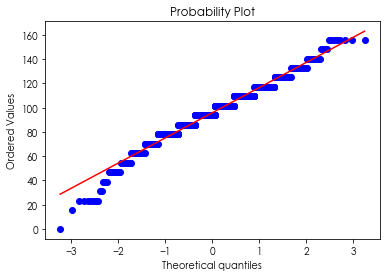

In [14]:
stats.probplot(ccss.index1, plot = plt)

In [15]:
# Pareto图
data = ccss.s5.value_counts()
data

公司普通职员（白领）       349
企/事业管理人员         177
退休               125
个体经营者/私营业主       123
无业/待业/失业/家庭主妇     87
工人/体力工作者（蓝领）      81
专业人士（如医生、律师等）     51
其他职业              51
教师                43
国家公务员             33
学生                27
Name: s5, dtype: int64

In [16]:
prob = data.cumsum() / data.sum()
prob

公司普通职员（白领）       0.304272
企/事业管理人员         0.458588
退休               0.567568
个体经营者/私营业主       0.674804
无业/待业/失业/家庭主妇    0.750654
工人/体力工作者（蓝领）     0.821273
专业人士（如医生、律师等）    0.865737
其他职业             0.910201
教师               0.947690
国家公务员            0.976460
学生               1.000000
Name: s5, dtype: float64

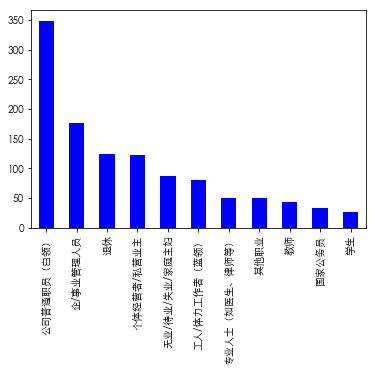

In [17]:
data.plot.bar(color = 'b')

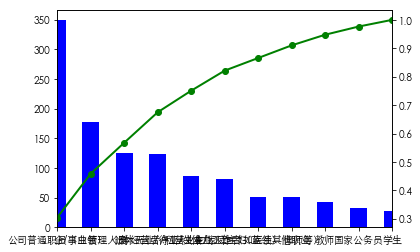

In [18]:
data.plot.bar(color = 'b')
prob.plot(color = 'g', secondary_y = True, style = '-o', linewidth = 2)

In [19]:
#人口金字塔
ccss['s3cls'] = pd.cut(ccss.s3, bins = [15,20,25,30,35,40,45,50,55,60,65])
ccss.s3cls.head()

0    (15, 20]
1    (20, 25]
2    (15, 20]
3    (60, 65]
4    (35, 40]
Name: s3cls, dtype: category
Categories (10, interval[int64]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (45, 50] < (50, 55] < (55, 60] < (60, 65]]

In [20]:
data = pd.crosstab(ccss.s3cls, ccss.s2, normalize = 'columns')
data

s2,女,男
s3cls,,
"(15, 20]",0.049020,0.048666
"(20, 25]",0.221569,0.169545
"(25, 30]",0.196078,0.235479
"(30, 35]",0.096078,0.130298
"(35, 40]",0.086275,0.095761
"(40, 45]",0.068627,0.084772
"(45, 50]",0.107843,0.065934
"(50, 55]",0.056863,0.047096
"(55, 60]",0.074510,0.072214


In [21]:
data['男'] = - data.男
data

s2,女,男
s3cls,,
"(15, 20]",0.049020,-0.048666
"(20, 25]",0.221569,-0.169545
"(25, 30]",0.196078,-0.235479
"(30, 35]",0.096078,-0.130298
"(35, 40]",0.086275,-0.095761
"(40, 45]",0.068627,-0.084772
"(45, 50]",0.107843,-0.065934
"(50, 55]",0.056863,-0.047096
"(55, 60]",0.074510,-0.072214


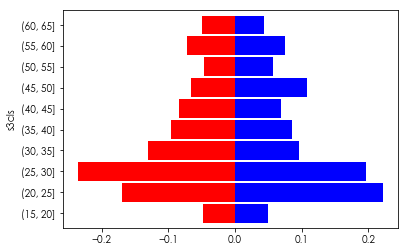

In [22]:
# 用拼图的方式绘制人口金字塔
data.男.plot.barh(color = 'r', width = 0.9)
data.女.plot.barh(color = 'b', width = 0.9)

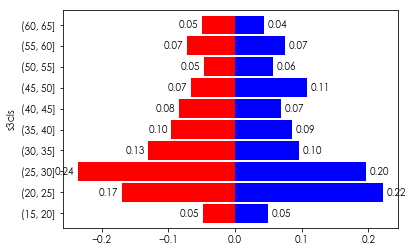

In [23]:
# 用拼图的方式绘制人口金字塔
data.男.plot.barh(color = 'r', width = 0.9)
data.女.plot.barh(color = 'b', width = 0.9)

# 在恰当的位置增加数值标签
for i in range(len(data)):
    plt.text(data.女[i] + 0.02, i, '%.2f' % data.女[i],
             ha = 'center', va = "center")
    plt.text(data.男[i] - 0.02, i, '%.2f' % - data.男[i],
             ha = 'center', va = "center")

In [24]:
# 雷达图
# 生成所需的数据
data = ccss.s5.value_counts(sort = False, normalize = True)
data

国家公务员            0.028771
个体经营者/私营业主       0.107236
工人/体力工作者（蓝领）     0.070619
无业/待业/失业/家庭主妇    0.075850
退休               0.108980
其他职业             0.044464
企/事业管理人员         0.154316
教师               0.037489
学生               0.023540
公司普通职员（白领）       0.304272
专业人士（如医生、律师等）    0.044464
Name: s5, dtype: float64

In [25]:
# 生成绘图用弧度数据，注意跳开终点数值
angles = np.linspace(0, 2*np.pi, len(data), endpoint = False)
angles

array([ 0.        ,  0.57119866,  1.14239733,  1.71359599,  2.28479466,
        2.85599332,  3.42719199,  3.99839065,  4.56958931,  5.14078798,
        5.71198664])

In [26]:
# 添加终点值，使曲线坐标闭合
data1 = np.concatenate((data, [data[0]])) # 闭合
angles = np.concatenate((angles, [angles[0]]))# 闭合
angles

array([ 0.        ,  0.57119866,  1.14239733,  1.71359599,  2.28479466,
        2.85599332,  3.42719199,  3.99839065,  4.56958931,  5.14078798,
        5.71198664,  0.        ])

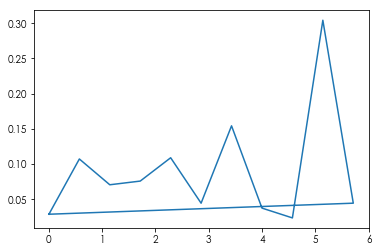

In [27]:
# 默认参数时的绘图效果
plt.plot(angles, data1)

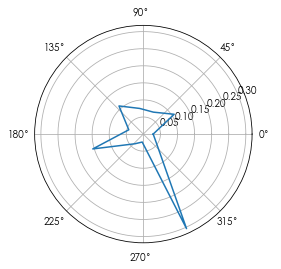

In [28]:
# 使用极坐标方式绘图
fig = plt.figure()
ax = fig.add_subplot(111, polar = True) # 使用polar参数
ax.plot(angles, data1) # 曲线

(<a list of 24 Line2D ticklines objects>,
 <a list of 12 Text major ticklabel objects>)

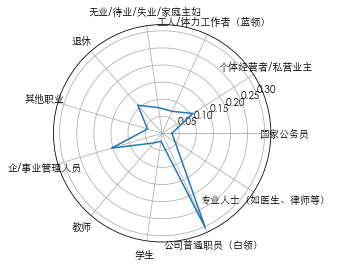

In [29]:
# 使用极坐标方式绘图
fig = plt.figure()
ax = fig.add_subplot(111, polar = True)# 使用polar参数
ax.plot(angles, data1)# 画线
# 在适当位置显示标签
ax.set_thetagrids(angles * 180 / np.pi, data.index)

In [30]:
# 复合饼图
# 生成绘图用数据
data = pd.crosstab(ccss.s2, ccss.s5)
data

s5,专业人士（如医生、律师等）,个体经营者/私营业主,企/事业管理人员,公司普通职员（白领）,其他职业,国家公务员,学生,工人/体力工作者（蓝领）,教师,无业/待业/失业/家庭主妇,退休
s2,,,,,,,,,,,
女,18,39,62,163,18,12,11,31,20,53,83
男,33,84,115,186,33,21,16,50,23,34,42


([<matplotlib.patches.Wedge at 0xe0c6ed0>,
 [Text(1.09325,0.121718,''),
  Text(0.98468,0.490312,''),
  Text(0.514423,0.972301,''),
  Text(-0.86122,0.684324,''),
  Text(-0.993572,-0.472033,''),
  Text(-0.889919,-0.646564,''),
  Text(-0.789703,-0.765747,''),
  Text(-0.56751,-0.942302,''),
  Text(-0.248546,-1.07155,''),
  Text(0.241941,-1.07306,''),
  Text(0.959332,-0.538222,'')])

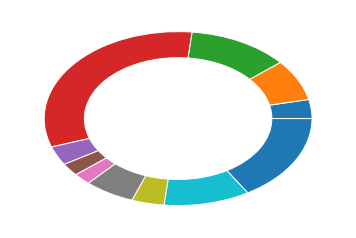

In [31]:
# 设定圆环宽度
size = 0.3
# 绘制最外层圆环， 加绘边框色使得扇区更清晰
plt.pie(data.iloc[0,:], radius = 1,
        wedgeprops = dict(width = size, edgecolor = 'w'))

([<matplotlib.patches.Wedge at 0xdde8bf0>,
 [Text(0.759825,0.124766,''),
  Text(0.568736,0.519076,''),
  Text(-0.115388,0.761305,''),
  Text(-0.768418,-0.0493341,''),
  Text(-0.318613,-0.700989,''),
  Text(-0.122892,-0.76013,''),
  Text(0.0170874,-0.76981,''),
  Text(0.262364,-0.723923,''),
  Text(0.50058,-0.585081,''),
  Text(0.643248,-0.423239,''),
  Text(0.75354,-0.158358,'')])

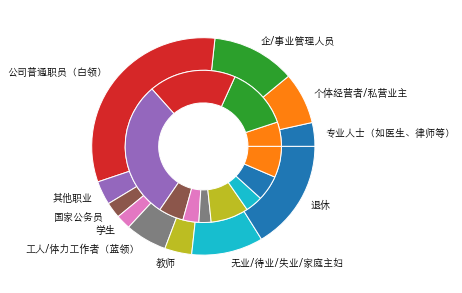

In [32]:
plt.figure(figsize = (5,5))
# 绘制最外层圆环，并加上标签
plt.pie(data.iloc[0,:], radius = 1,
        wedgeprops = dict(width = size, edgecolor = 'w'),
        labels = data.columns)
# 绘制内层圆环
plt.pie(data.iloc[1,:], radius = 1 - size,
        wedgeprops = dict(width = size, edgecolor = 'w'))

In [33]:
# 由于类别数较多，考虑使用等分的HUSL配色方案以免重合
# 在matplotlib中使用，需要将配色方案直接转换为数值映射
colorlist = sns.color_palette("husl", n_colors = len(data.columns))
colorlist

[(0.96779755929199129, 0.44127456009157356, 0.53581031550587011),
 (0.88364430491128931, 0.52400735243696339, 0.19569304285113343),
 (0.71013068731690199, 0.60468521926632679, 0.19426060163712158),
 (0.54327767212475286, 0.65409810951852154, 0.19324494273892204),
 (0.19592059105779686, 0.69816200174878384, 0.3452219818913641),
 (0.2067117296964458, 0.68291034042547916, 0.58299889258223281),
 (0.21420912437215422, 0.67149635572586808, 0.69862066642031773),
 (0.22537170008202412, 0.65314001484807749, 0.84100780531334296),
 (0.55969438020993079, 0.5764402169887779, 0.95839307131503471),
 (0.85789788037402315, 0.44058452715322166, 0.957819659566579),
 (0.96286538507048058, 0.40259284540597962, 0.7779310354076443)]

([<matplotlib.patches.Wedge at 0xe83c630>,
 [Text(0.759825,0.124766,''),
  Text(0.568736,0.519076,''),
  Text(-0.115388,0.761305,''),
  Text(-0.768418,-0.0493341,''),
  Text(-0.318613,-0.700989,''),
  Text(-0.122892,-0.76013,''),
  Text(0.0170874,-0.76981,''),
  Text(0.262364,-0.723923,''),
  Text(0.50058,-0.585081,''),
  Text(0.643248,-0.423239,''),
  Text(0.75354,-0.158358,'')])

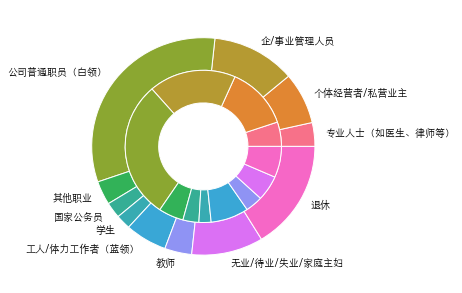

In [34]:
plt.figure(figsize = (5, 5))
# 绘制最外层圆环，并加上标签
plt.pie(data.iloc[0,:], radius = 1,
        wedgeprops = dict(width = size, edgecolor = 'w'),
        colors = colorlist, labels = data.columns)
# 绘制内层圆环
plt.pie(data.iloc[1,:], radius = 1 - size,
        wedgeprops = dict(width = size, edgecolor = 'w'),
        colors = colorlist,)

In [36]:
 # 热图
# 汇总出所需的数据
data = ccss.pivot_table(index = 's9', columns = 's5', values = 'index1')
data.head()

s5,专业人士（如医生、律师等）,个体经营者/私营业主,企/事业管理人员,公司普通职员（白领）,其他职业,国家公务员,学生,工人/体力工作者（蓝领）,教师,无业/待业/失业/家庭主妇,退休
s9,,,,,,,,,,,
1000-1499元,101.538702,89.822698,73.420292,91.124476,78.106694,NaN,70.296024,93.728032,NaN,80.338314,91.124476
10000-14999元,107.117751,112.994350,94.961296,98.284256,105.444037,93.728032,117.160041,117.160041,87.870030,76.544560,92.612223
1500-1999元,93.728032,117.160041,121.065375,98.121534,101.538702,NaN,124.970710,83.313807,NaN,78.106694,87.870030
15000-19999元,101.538702,91.775365,98.935145,105.143626,104.142258,91.124476,NaN,70.296024,93.728032,78.106694,109.349371
2000-2999元,93.728032,102.840480,108.568304,93.458699,78.106694,NaN,109.349371,88.320646,92.751699,91.775365,89.418698


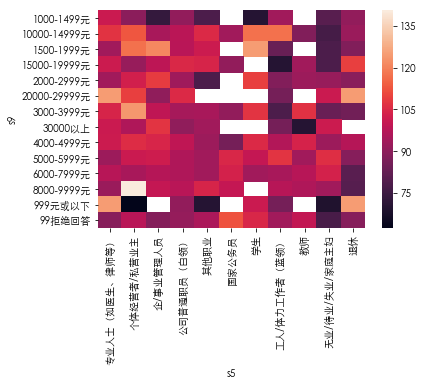

In [37]:
sns.heatmap(data)

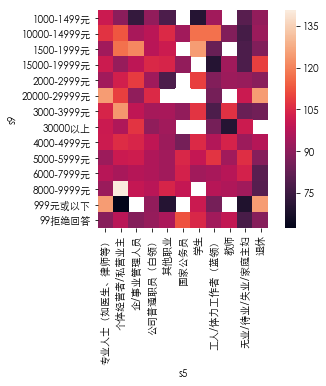

In [38]:
sns.heatmap(data, square = True)

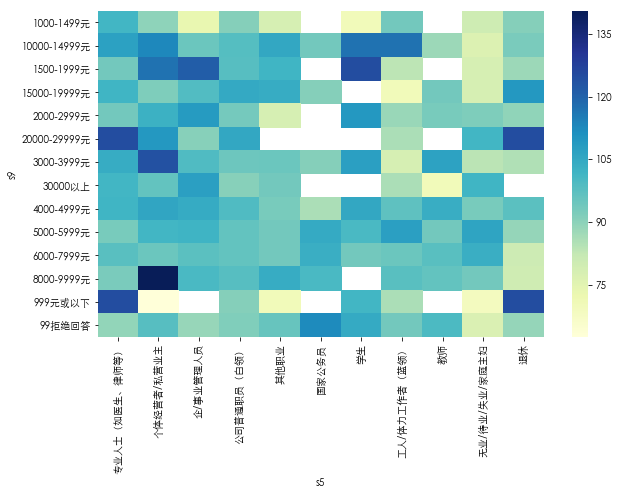

In [39]:
# 设置图形大小和颜色配置
plt.figure(figsize = (10,6))
sns.heatmap(data, cmap = 'YlGnBu')

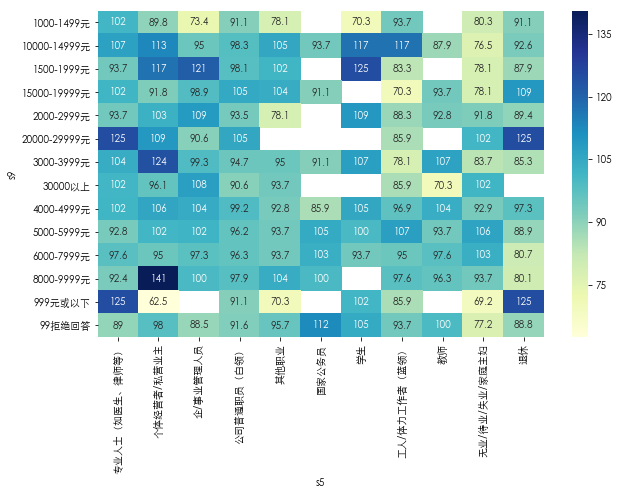

In [40]:
# 在图中标注数值
plt.figure(figsize=(10,6))
sns.heatmap(data,cmap = 'YlGnBu', annot = True, fmt = '.3g')

In [41]:
# 重新整理数据用于排序
data2 = ccss.pivot_table(index = 's9', columns = 's5',
                         values = 'index1', margins = True)
data2

s5,专业人士（如医生、律师等）,个体经营者/私营业主,企/事业管理人员,公司普通职员（白领）,其他职业,国家公务员,学生,工人/体力工作者（蓝领）,教师,无业/待业/失业/家庭主妇,退休,All
s9,,,,,,,,,,,,
1000-1499元,101.538702,89.822698,73.420292,91.124476,78.106694,NaN,70.296024,93.728032,NaN,80.338314,91.124476,84.875941
10000-14999元,107.117751,112.994350,94.961296,98.284256,105.444037,93.728032,117.160041,117.160041,87.870030,76.544560,92.612223,98.326249
1500-1999元,93.728032,117.160041,121.065375,98.121534,101.538702,NaN,124.970710,83.313807,NaN,78.106694,87.870030,96.042305
15000-19999元,101.538702,91.775365,98.935145,105.143626,104.142258,91.124476,NaN,70.296024,93.728032,78.106694,109.349371,99.062148
2000-2999元,93.728032,102.840480,108.568304,93.458699,78.106694,NaN,109.349371,88.320646,92.751699,91.775365,89.418698,93.660699
20000-29999元,124.970710,109.349371,90.603765,105.444037,NaN,NaN,NaN,85.917363,NaN,101.538702,124.970710,102.897079
3000-3999元,104.142258,123.854900,99.307082,94.729400,95.029811,91.124476,107.396704,78.106694,106.745815,83.685743,85.266474,94.572429
30000以上,101.538702,96.071233,107.613667,90.603765,93.728032,NaN,NaN,85.917363,70.296024,101.538702,NaN,97.507389
4000-4999元,101.538702,105.877963,104.378945,99.241446,92.751699,85.917363,105.444037,96.852300,103.770322,92.860180,97.332957,99.044539


In [42]:
# 去掉不需要的汇总列
data2 = data2.iloc[:,:-1]
data2 

s5,专业人士（如医生、律师等）,个体经营者/私营业主,企/事业管理人员,公司普通职员（白领）,其他职业,国家公务员,学生,工人/体力工作者（蓝领）,教师,无业/待业/失业/家庭主妇,退休
s9,,,,,,,,,,,
1000-1499元,101.538702,89.822698,73.420292,91.124476,78.106694,NaN,70.296024,93.728032,NaN,80.338314,91.124476
10000-14999元,107.117751,112.994350,94.961296,98.284256,105.444037,93.728032,117.160041,117.160041,87.870030,76.544560,92.612223
1500-1999元,93.728032,117.160041,121.065375,98.121534,101.538702,NaN,124.970710,83.313807,NaN,78.106694,87.870030
15000-19999元,101.538702,91.775365,98.935145,105.143626,104.142258,91.124476,NaN,70.296024,93.728032,78.106694,109.349371
2000-2999元,93.728032,102.840480,108.568304,93.458699,78.106694,NaN,109.349371,88.320646,92.751699,91.775365,89.418698
20000-29999元,124.970710,109.349371,90.603765,105.444037,NaN,NaN,NaN,85.917363,NaN,101.538702,124.970710
3000-3999元,104.142258,123.854900,99.307082,94.729400,95.029811,91.124476,107.396704,78.106694,106.745815,83.685743,85.266474
30000以上,101.538702,96.071233,107.613667,90.603765,93.728032,NaN,NaN,85.917363,70.296024,101.538702,NaN
4000-4999元,101.538702,105.877963,104.378945,99.241446,92.751699,85.917363,105.444037,96.852300,103.770322,92.860180,97.332957


In [43]:
# 对数据进行排序
data2.sort_values(by = "All", axis = 'columns', inplace = True)
data2

c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


s5,无业/待业/失业/家庭主妇,退休,工人/体力工作者（蓝领）,教师,公司普通职员（白领）,其他职业,企/事业管理人员,专业人士（如医生、律师等）,国家公务员,个体经营者/私营业主,学生
s9,,,,,,,,,,,
1000-1499元,80.338314,91.124476,93.728032,NaN,91.124476,78.106694,73.420292,101.538702,NaN,89.822698,70.296024
10000-14999元,76.544560,92.612223,117.160041,87.870030,98.284256,105.444037,94.961296,107.117751,93.728032,112.994350,117.160041
1500-1999元,78.106694,87.870030,83.313807,NaN,98.121534,101.538702,121.065375,93.728032,NaN,117.160041,124.970710
15000-19999元,78.106694,109.349371,70.296024,93.728032,105.143626,104.142258,98.935145,101.538702,91.124476,91.775365,NaN
2000-2999元,91.775365,89.418698,88.320646,92.751699,93.458699,78.106694,108.568304,93.728032,NaN,102.840480,109.349371
20000-29999元,101.538702,124.970710,85.917363,NaN,105.444037,NaN,90.603765,124.970710,NaN,109.349371,NaN
3000-3999元,83.685743,85.266474,78.106694,106.745815,94.729400,95.029811,99.307082,104.142258,91.124476,123.854900,107.396704
30000以上,101.538702,NaN,85.917363,70.296024,90.603765,93.728032,107.613667,101.538702,NaN,96.071233,NaN
4000-4999元,92.860180,97.332957,96.852300,103.770322,99.241446,92.751699,104.378945,101.538702,85.917363,105.877963,105.444037


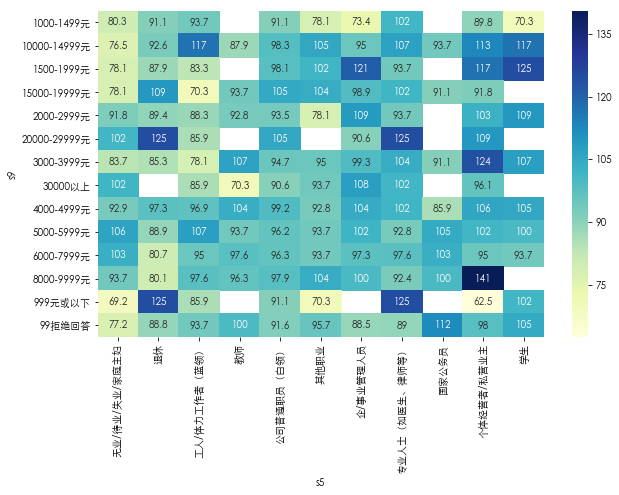

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(data2.iloc[:-1,:], cmap = 'YlGnBu',
            annot = True, fmt = '.3g')